### Лабораторная работа №6 ###
### Кыдыкова Гульназ WIN-1-22 ###

In [53]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Задание №2 ###

## Вновь рак груди ##

In [54]:
my_dataset = load_breast_cancer()

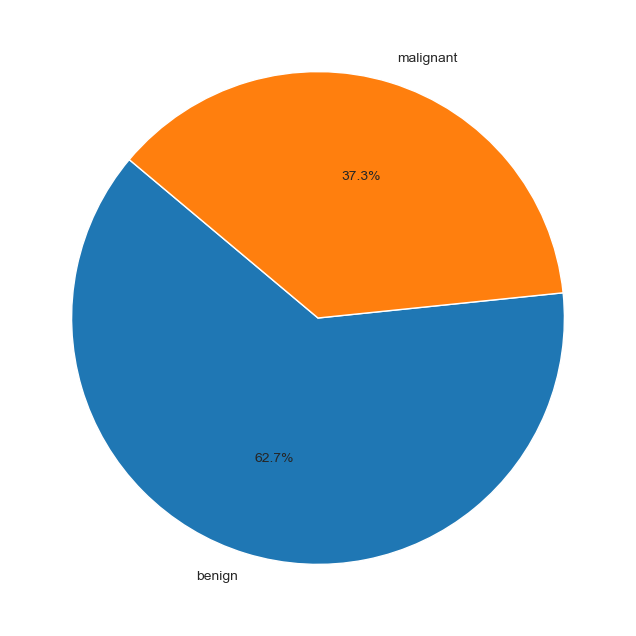

In [55]:
class_labels, class_counts = zip(*sorted(
    zip(my_dataset['target_names'], [sum(my_dataset['target'] == i) for i in range(len(my_dataset['target_names']))])))

plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=140)
plt.show()

<p> В прошлой лабараторной, где рассматривали три датасета была обнаружена следующая проблема с датасетом о раке груди. Классы в данном датасете были несбалансированы, что было характерно для датасетов связанных с диагностикой рака. Также было выяснено что при работе с данным датасетом требуется стандартизация или нормализация признаков. В общем, датасет не без изъянов)</p>

### Распределение признаков ###

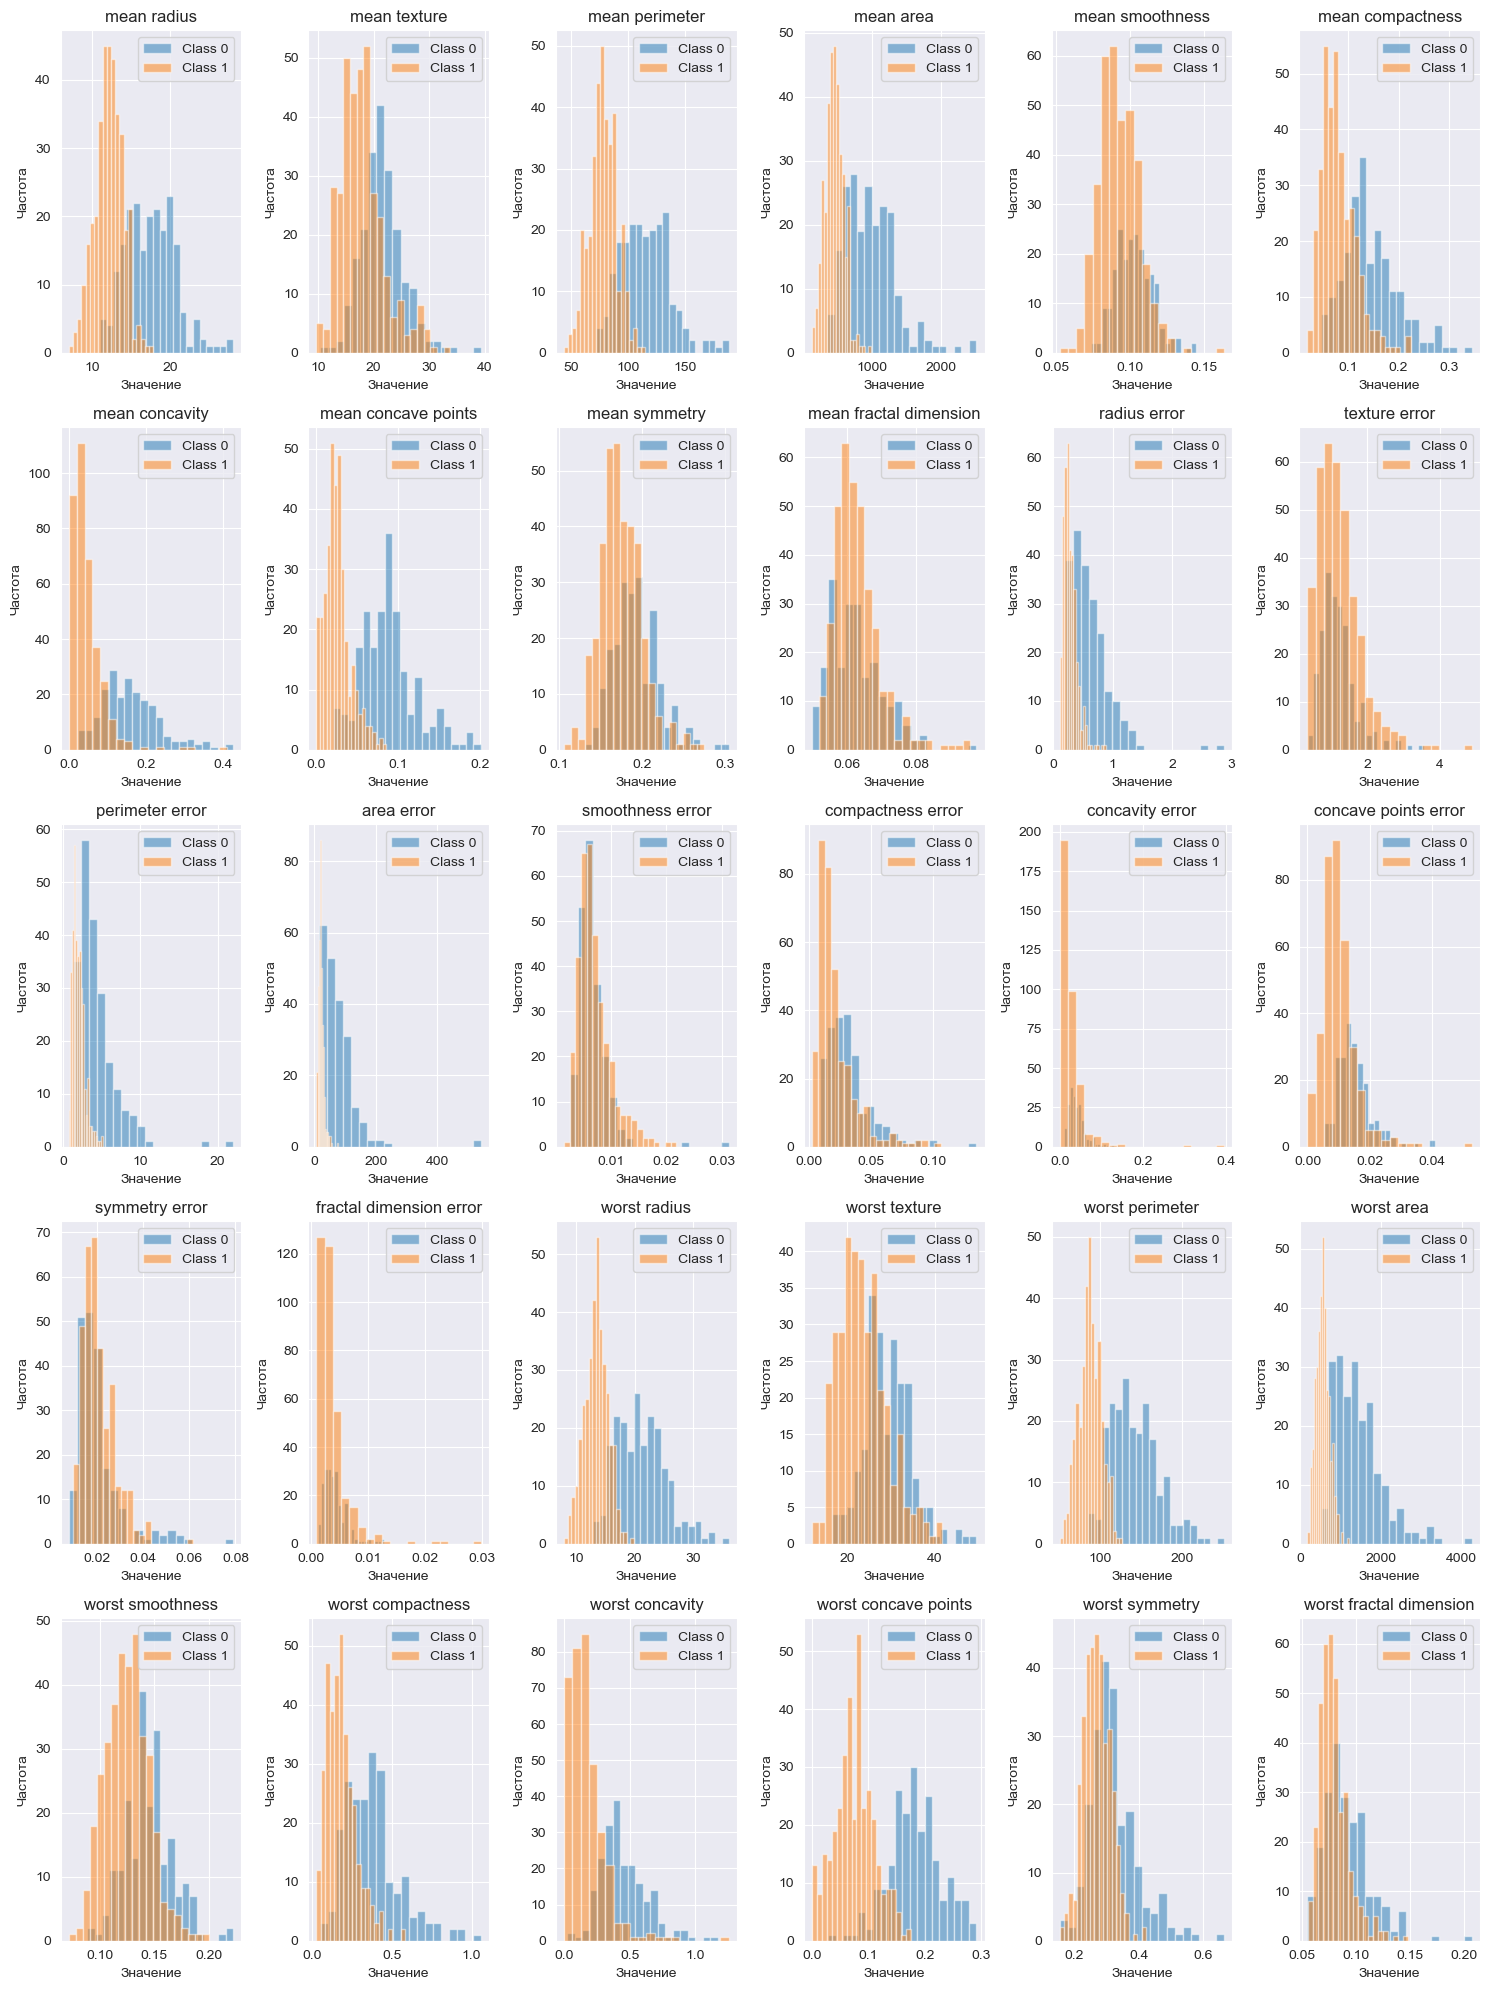

In [56]:
breast_cancer_df = pd.DataFrame(data=my_dataset['data'], columns=my_dataset['feature_names'])
breast_cancer_df['class'] = my_dataset['target']
unique_classes = breast_cancer_df['class'].unique()
plt.figure(figsize=(15, 20))
for i, feature in enumerate(my_dataset['feature_names']):
    plt.subplot(5, 6, i + 1)
    plt.title(feature)

    for breast_cancer_class in unique_classes:
        class_data = breast_cancer_df[breast_cancer_df['class'] == breast_cancer_class][feature]
        plt.hist(class_data, bins=20, alpha=0.5, label='Class ' + str(breast_cancer_class))

    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.legend()

plt.tight_layout()
plt.show()

<h4>Решетчатый поиск</h4>

In [57]:
X_training, X_testing, y_training, y_testing = train_test_split(my_dataset.data, my_dataset.target, random_state=13)

# Параметры для алгоритма поиска
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'kernel': ['rbf'],
}

grid_search = GridSearchCV(SVC(), param_grid=param_grid, cv=3)
grid_search.fit(X_training, y_training)

prediction = grid_search.predict(X_testing)
results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(6, 6)

print('Лучший результат: {}'.format(grid_search.best_score_))
print('Лучшие параметры: {}'.format(grid_search.best_params_))

Лучший результат: 0.9530516431924884
Лучшие параметры: {'C': 1.0, 'gamma': 0.001, 'kernel': 'rbf'}


<h4>Матрица ошибок</h4>

In [58]:
cm = confusion_matrix(y_testing, prediction)
print(cm)

[[45  4]
 [13 81]]


<h4>Отчет результативности модели по датасету</h4>

In [59]:
print(classification_report(y_testing, prediction, target_names=my_dataset.target_names))

              precision    recall  f1-score   support

   malignant       0.78      0.92      0.84        49
      benign       0.95      0.86      0.91        94

    accuracy                           0.88       143
   macro avg       0.86      0.89      0.87       143
weighted avg       0.89      0.88      0.88       143



<p>По итогам решетчатого поиска мы добились лучшего результата в 95%, что выдает на два процента лучше чем в прошлый раз (в 4 лабораторной лучшим результатом было 93%). Также по данным матрицы ошибок мы выявили, что было перепутано 4 раза злокачественных с доброкачественными, и наоборот 13 раз. Ну, в отчете кристально понятно, что предсказания доброкачественной опухоли гораздо точнее чем злокачественной на 17%, это может быть свзяанно с количеством экземпляров(как показано на круговой диаграмме 37% на 63%). Вероятно увеличение экземпляров (к примеру 1000 экземпляров злокачественной опухоли и также 1000 доброкачественных) помогло бы в предсказывании и сделало бы его точнее.</p>

### Задание №3 ###

In [60]:
data = {'salary': [], 'city': [], 'age': [], 'vacation_prefer': [], 'transport_prefer': [], 'target': []}

for _ in range(1000):
    data['salary'].append(random.randint(30000, 200000)) # Зарплата
    data['city'].append(random.choice(['New York', 'Oklahoma', 'Man'])) # Добавьте города
    data['age'].append(random.randint(1, 120)) # Возраст
    data['vacation_prefer'].append(random.choice(['Reading', 'Filming', 'Gaming'])) # Развлечения
    data['transport_prefer'].append(random.choice(['Bus'])) # Предпочитаемый транспорт
    data['target'].append(random.choice(['Washington', 'Italy'])) # Город назначения (делайте не более 3)
    
df = pd.DataFrame(data)

In [61]:
df = pd.get_dummies(df, columns=['city', 'vacation_prefer', 'transport_prefer'])

In [62]:
X_training, X_testing, y_training, y_testing = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

In [63]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'kernel': ['rbf'],
}

grid_search = GridSearchCV(SVC(), param_grid=param_grid, cv=3)
grid_search.fit(X_training, y_training)
prediction = grid_search.predict(X_testing)

results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(6, 6)

### Оценка модели ###

In [64]:
print('Лучший результат: {}'.format(grid_search.best_score_))
print('Лучшие параметры: {}'.format(grid_search.best_params_))

Лучший результат: 0.5187500586672674
Лучшие параметры: {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}


### Матрица ошибок ###

In [65]:
cm = confusion_matrix(y_testing, prediction)
print(cm)

[[ 91   0]
 [109   0]]


### Отчет ###

In [66]:
prediction = grid_search.predict(X_testing)

print(classification_report(y_testing, prediction, target_names=['Washington', 'Italy'], zero_division=1))

              precision    recall  f1-score   support

  Washington       0.46      1.00      0.63        91
       Italy       1.00      0.00      0.00       109

    accuracy                           0.46       200
   macro avg       0.73      0.50      0.31       200
weighted avg       0.75      0.46      0.28       200



## Вывод ##

<p> Итак, опираясь на отчет мы видим что предсказания были выявлены неодзнозначно. Предсказания полетов в Вашингтон было довольно неплохим по сравнению с Италией, где не было угадано ничего. Также стоит обратить внимание на низкую общую точность, что может быть вызвано дисбалансом классов или другими проблемами в модели. По сведениям матрицы ошибок видно, что было угадано все полеты в Вашингтон, и также ни одного в Италию. Смело будет предположить, что это связано с рандомом. Ибо это интересно, можно соотнести данный принцип с тем, что и вопрос двум людям с разными интересами, хобби и зарплатой - "Куда вы хотите улететь?". В общем и целом как улучшить данную модель? Можно отсортировать данные иным способом, не рандомом. Скажем, людям пожилого возраста или попросту состоятельным свойственно летать в более дорогие страны, таким образом мы отсортируем людей по категориям, а значит сможем лучше предсказать и таким образом улучшить данную модель.